# Plot history

In this file, we are going to plot the results of our simulation.

We will perform the following actions:
* Plot the real values of the PDE function
* Plot the estimated PDE values generated using Monte Carlo simulation

Please run the following codes:

## Table of Content

- [1 - Packages](#1)
- [2 - Plotting the results of our simulation](#2)
    - [2.1 - Load the relevant csv files](#2-1)
    - [2.2 - Plot the PDE in one dimension: fix x in {2, 3, ..., 10} and varies t within [0, x-1]](#2-2)

<a name='1'></a>
## 1 - Packages

Run the cell below to import all the libraries you'll need:

In [1]:
# From system
import os
import shutil
from pathlib import Path
import random

# Data structure
import numpy as np
import pandas as pd
import json
import csv

# Image processing
import cv2
from matplotlib import pyplot as plt

<a name='2'></a>
## 2 - Plotting the results of our simulation

<a name='2-1'></a>
### 2.1 - Load the relevant csv files

In [3]:
np_dictionary = {}

dir_name = "output"
os_listdir = os.listdir(dir_name)
for file_name in os_listdir:
    file_path = os.path.join(dir_name, file_name)
    data =  pd.read_csv(file_path, delimiter=',', dtype=None, header=None)
    np_dictionary[file_name[:-4]] = data

<a name='2-3'></a>
### 2.2 - Plot the PDE in one dimension: fix x=3 and varies t within [0, 2]

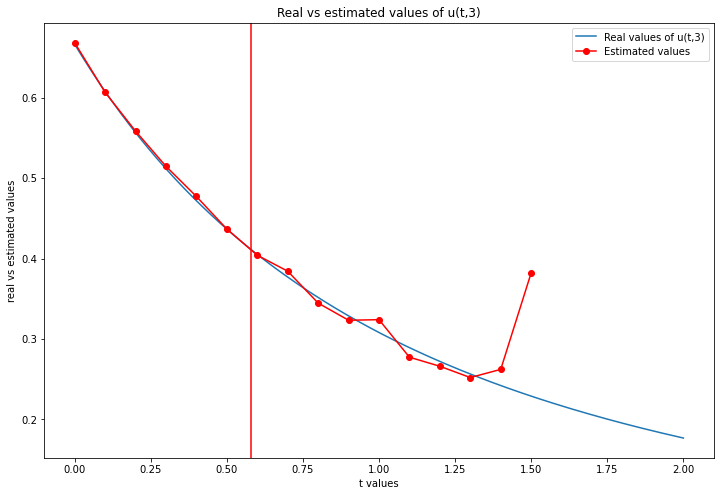

In [25]:
impose_ylim = False
y_lim = [0,0.2]

real_values = np.asarray(np_dictionary["analytic"])
real_values = np.reshape(real_values, (1001,))[0:201]
t_values = np.arange(0, 2.01, 0.01)
estimated_values = np.asarray(np_dictionary["monte_carlo"])
estimated_values = np.reshape(estimated_values, (21,))[0:16]
t_estimated = np.arange(0, 1.6, 0.1)

plt.figure(figsize=(12, 8))
plt.plot(t_values, real_values, label='Real values of u(t,3)')
plt.plot(t_estimated, estimated_values, 'ro-', label='Estimated values')

plt.ylabel('real vs estimated values')
if impose_ylim:
    plt.ylim(y_lim)
plt.xlabel('t values')
plt.axvline(x=0.58,color='red')

plt.title('Real vs estimated values of u(t,3)')
plt.legend(loc='upper right')
plt.show()

In [23]:
import math

t_vector = [i/100 for i in range(200)]
bound = []
for T in t_vector:
    estimated_bound = 36 * math.sqrt(2) * (pow(3+T, -2) + pow(3-T, -2)) * (pow(3-T, -2) - pow(3+T, -2)) * T * math.exp(2*T) * (1-math.exp(-T))
    bound.append(estimated_bound)

bound_print = [(i, bound[i]) for i in range(200)]
print(bound_print)

[(0, 0.0), (1, 1.7015376623033741e-06), (2, 1.3820500876447978e-05), (3, 4.736326876854531e-05), (4, 0.00011401286723624826), (5, 0.0002261683273994044), (6, 0.0003969861011459812), (7, 0.0006404236430887555), (8, 0.0009712852740633953), (9, 0.0014052704474342354), (10, 0.0019590245459491355), (11, 0.002650192343717754), (12, 0.003497474275099972), (13, 0.004520685659903147), (14, 0.0057408190423235686), (15, 0.007180109809550366), (16, 0.008862105264908385), (17, 0.010811737339873968), (18, 0.013055399139286944), (19, 0.015621025524629831), (20, 0.018538177951389723), (21, 0.02183813378828626), (22, 0.025553980358587344), (23, 0.029720713956870176), (24, 0.0343753441084725), (25, 0.03955700335354852), (26, 0.045307062853156756), (27, 0.0516692541311968), (28, 0.05868979728334646), (29, 0.0664175360024748), (30, 0.07490407978938426), (31, 0.08420395373822794), (32, 0.09437475630762505), (33, 0.10547732551142945), (34, 0.1175759139873601), (35, 0.13073837342737968), (36, 0.1450363488808

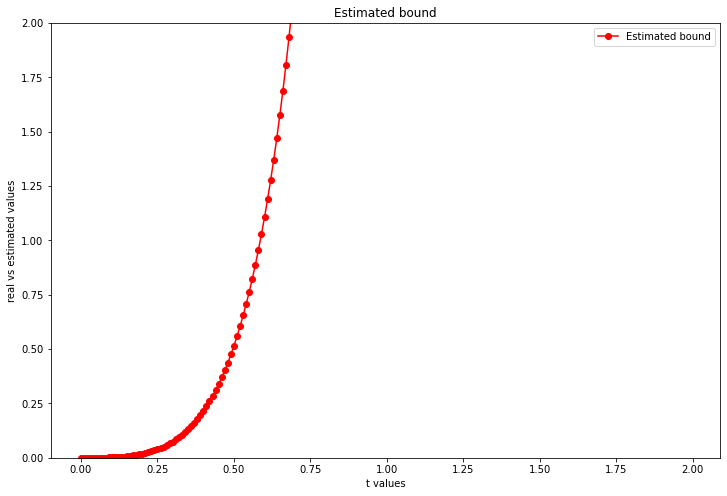

In [24]:
impose_ylim = True
y_lim = [0,2]

plt.figure(figsize=(12, 8))
plt.plot(t_vector, bound, 'ro-', label='Estimated bound')

plt.ylabel('real vs estimated values')
if impose_ylim:
    plt.ylim(y_lim)
plt.xlabel('t values')
# plt.axvline(x=30,color='red')

plt.title('Estimated bound')
plt.legend(loc='upper right')
plt.show()